# Hands-on: Geospatial Data with `geopandas`

This hands-on will introduce you to `geopandas` which allows you to read in _vector_ spatial data and also visualize it which builds on your tool set for exploratory data analysis and visualization.

If you're interested in knowing how to handle _raster_ data, there's a library called [rasterio](https://rasterio.readthedocs.io/en/stable/).

In [1]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import Point

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Reading Files

`geopandas` is built mainly for vector-based spatial data. It utilizes the [`fiona`](https://fiona.readthedocs.io/en/latest/README.html) library which is capable of reading and writing a variety of GIS-formats.

For this class, we will focus on loading data from **shapefiles and GeoJSON formats**.

The main function to read in these files is `gpd.read_file`.

In [2]:
gpd.read_file?

### Shapefile

Download the geometric administrative boundaries of the Philippines from GADM.

GADM Philippines: https://biogeo.ucdavis.edu/data/gadm3.6/shp/gadm36_PHL_shp.zip

Note that this is a ZIP file. Unzip the main folder to DSDATA and keep the folder structure within as is.

In [3]:
# Read shapefile
ph = gpd.read_file('./gadm36_PHL_shp/gadm36_PHL_1.shp')
ph


,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,PHL,Philippines,PHL.1_1,Abra,None,None,Lalawigan|Probinsya,Province,1401,PH.AB,"POLYGON ((120.77473 17.16318, 120.76637 17.159..."
1,PHL,Philippines,PHL.2_1,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,1602,PH.AN,"POLYGON ((125.44627 8.66631, 125.44199 8.66333..."
2,PHL,Philippines,PHL.3_1,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,1603,PH.AS,"POLYGON ((125.90923 7.99845, 125.90176 7.99794..."
3,PHL,Philippines,PHL.4_1,Aklan,None,None,Lalawigan|Probinsya,Province,604,PH.AK,"MULTIPOLYGON (((122.42083 11.63194, 122.42000 ..."
4,PHL,Philippines,PHL.5_1,Albay,None,None,Lalawigan|Probinsya,Province,505,PH.AL,"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ..."
...,...,...,...,...,...,...,...,...,...,...,...
76,PHL,Philippines,PHL.77_1,Tawi-Tawi,None,None,Lalawigan|Probinsya,Province,1570,PH.TT,"MULTIPOLYGON (((119.46694 4.58694, 119.46639 4..."
77,PHL,Philippines,PHL.78_1,Zambales,None,None,Lalawigan|Probinsya,Province,155,PH.PN,"MULTIPOLYGON (((120.08285 14.75048, 120.08222 ..."
78,PHL,Philippines,PHL.79_1,Zamboanga del Norte,None,None,Lalawigan|Probinsya,Province,972,PH.ZN,"MULTIPOLYGON (((122.09467 7.53152, 122.09467 7..."
79,PHL,Philippines,PHL.80_1,Zamboanga del Sur,None,None,Lalawigan|Probinsya,Province,973,PH.ZS,"MULTIPOLYGON (((122.29816 6.87506, 122.29816 6..."


In [4]:
type(ph)

geopandas.geodataframe.GeoDataFrame

(116.444486621, 127.089197159, 3.7627797585, 21.894300891500002)

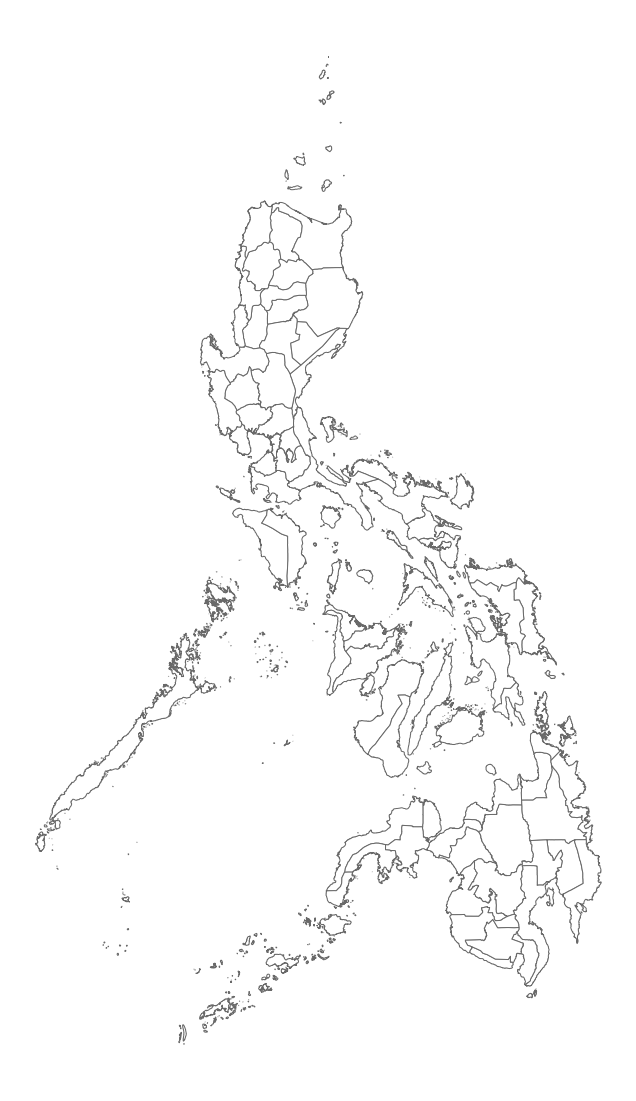

In [5]:
ax = ph.plot(figsize=(30,20), color="w", edgecolor="dimgray")

ax.axis('off')

### GeoJSON

For GeoJSON, you must specify the `driver='GeoJSON'` to the `read_file` function.

The data below is from the Humanitarian Data Exchange. Download it and place it in `DSDATA` as well.

Philippine Health Sites: https://data.humdata.org/dataset/20e5069f-1eb8-465b-98c8-3442a62cd3f0/resource/ca65b30e-02c8-4fad-8771-fb220ddc444f/download/philippines.geojson

In [6]:
# Read GeoJSON file
healthsites = gpd.read_file('./philippines.geojson', driver='GeoJSON')
healthsites.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry
0,4714668590,node,9.0,,pharmacy,,,,,46542719.0,...,Innoc,,,,,,,None,None,POINT (122.63445 10.94470)
1,6489465986,node,9.0,,doctors,,,,,70494207.0,...,RenAshbell,,,,,,,None,None,POINT (124.24163 8.22731)
2,775561027,way,31.0,,hospital,,Dalan na Pagayaya,Department of Health,,81346192.0,...,mapbeks,,,,,hospital,government,None,None,"POLYGON ((121.74563 17.65639, 121.74616 17.657..."
3,497119467,node,15.0,,pharmacy,,Shorthorn,,,86331991.0,...,mipangan,,,,,,,None,None,POINT (121.02008 14.66840)
4,601647960,way,12.0,,hospital,,,,,60145823.0,...,GOwin,,,,,,,None,None,"POLYGON ((120.45718 15.80609, 120.45738 15.806..."


### CSV

Sometimes we have data in a normal CSV file but it also contains geographic information in different columns. A common example would be having the longitude and latitude in two separate columns. Since we are aware that there is value in having the data as a geometric point, there is a way to convert two columns to a `Point` using `shapely`.

CitiBike Historical Trip Data: https://s3.amazonaws.com/tripdata/index.html

We should already have the a CitiBike trip data file from the previous lab.

In [7]:
# Read in the data using pandas

citibike = pd.read_csv('./202102-citibike-tripdata.csv')
citibike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,304,2021-02-01 00:04:23.0780,2021-02-01 00:09:27.7920,3175,W 70 St & Amsterdam Ave,40.777480,-73.982886,4045,West End Ave & W 60 St,40.772370,-73.990050,27451,Subscriber,1996,2
1,370,2021-02-01 00:07:08.8080,2021-02-01 00:13:19.4670,3154,E 77 St & 3 Ave,40.773142,-73.958562,3725,2 Ave & E 72 St,40.768762,-73.958408,35000,Subscriber,1991,1
2,635,2021-02-01 00:07:55.9390,2021-02-01 00:18:31.0390,502,Henry St & Grand St,40.714211,-73.981095,411,E 6 St & Avenue D,40.722281,-73.976687,49319,Subscriber,1980,2
3,758,2021-02-01 00:08:42.0960,2021-02-01 00:21:20.7820,3136,5 Ave & E 63 St,40.766368,-73.971518,3284,E 88 St & Park Ave,40.781411,-73.955959,48091,Customer,1969,0
4,522,2021-02-01 00:09:32.6820,2021-02-01 00:18:15.4100,505,6 Ave & W 33 St,40.749013,-73.988484,3687,E 33 St & 1 Ave,40.743227,-73.974498,48596,Subscriber,1988,1


In [8]:
citibike.shape

(634631, 15)

Since the data is huge, this might take a long time to run because geometric operations is quite expensive (computationally) on a local machine. 

In [9]:
stations = citibike[['end station longitude', 'end station latitude']]

In [10]:
stations.drop_duplicates(inplace=True)
stations.shape

<ipython-input-10-2a765e21ed06>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations.drop_duplicates(inplace=True)


(1283, 2)

In [11]:
# Create the geometry
geometry = [Point(xy) for xy in zip(stations['end station longitude'], 
                                    stations['end station latitude'])]

# Set the crs
crs = {'init': 'epsg:4326'}

# Create the GeoDataFrame from the DataFrame
citi_gdf = gpd.GeoDataFrame(stations, crs=crs, geometry=geometry)
citi_gdf.head()

C:\Users\gelin\anaconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,end station longitude,end station latitude,geometry
0,-73.990050,40.772370,POINT (-73.99005 40.77237)
1,-73.958408,40.768762,POINT (-73.95841 40.76876)
2,-73.976687,40.722281,POINT (-73.97669 40.72228)
3,-73.955959,40.781411,POINT (-73.95596 40.78141)
4,-73.974498,40.743227,POINT (-73.97450 40.74323)


## Basic Visualization

With `matplotlib` and `descartes` built into `geopandas`, we can easily plot a `GeoDataFrame` by simply calling the `plot` function. Most of the parameters that come with the `plot` function from `pandas` can also be used here.

(116.444486621, 127.089197159, 3.7627797585, 21.894300891500002)

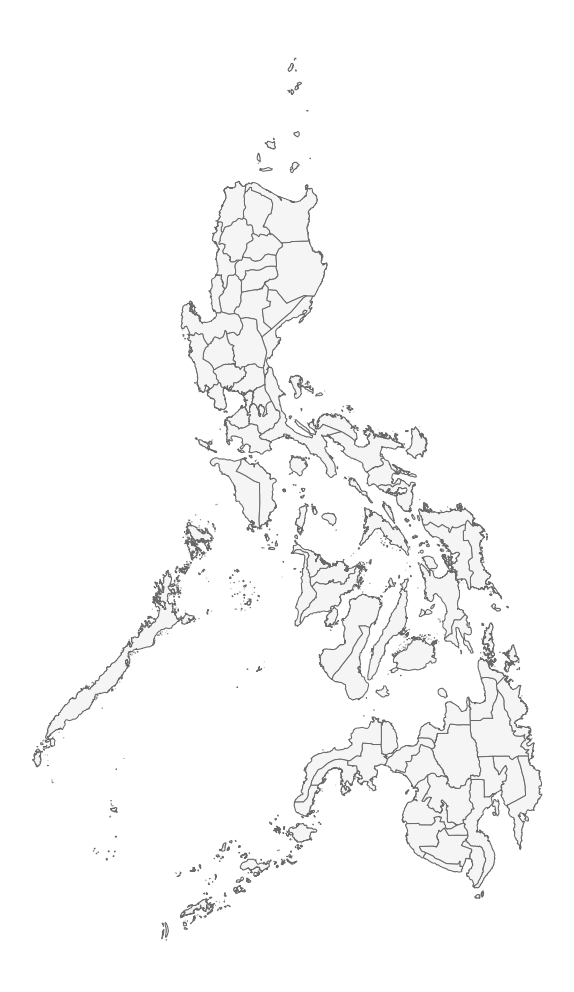

In [12]:
ax = ph.plot(figsize=(15, 18), color='whitesmoke', edgecolor='dimgray')
ax.axis('off')

## Projections
Different datasets would have different projections to minimize the distortion depending on where they are on the globe. When doing spatial analysis, it is normal to be working with multiple datasets in different formats and different projections depending on how they were collected or how they should be presented.

Let us take the example of the New York City Taxi Zones and CitiBike stations. We already have the CitiBike stations from the example above.

- NYC Taxi Zones: https://s3.amazonaws.com/nyc-tlc/misc/taxi_zones.zip

In [13]:
taxi = gpd.read_file('./taxi_zones/taxi_zones.shp')
taxi.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

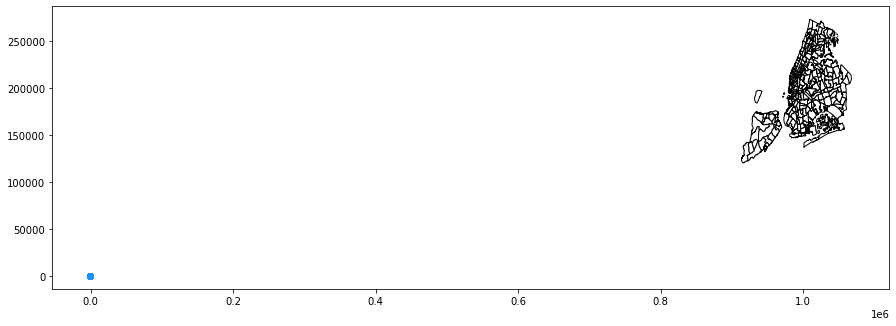

In [14]:
ax = taxi.plot(figsize=(15, 15), color='white', edgecolor='k')
citi_gdf.plot(ax=ax, color='dodgerblue', alpha=0.3);

In [15]:
print('Taxizones CRS', taxi.crs)
print('Citi Bike CRS', citi_gdf.crs)

Taxizones CRS epsg:2263
Citi Bike CRS +init=epsg:4326 +type=crs


In [16]:
# First option is to pass a dictionary like how we initialized the citibike dataframe - this is the CRS
citi_gdf = citi_gdf.to_crs({'init': 'epsg:2263'})

# Another is to simply pass the code for the epsg through the epsg parameter
#citi_gdf = citi_gdf.to_crs(epsg=2263)

C:\Users\gelin\anaconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


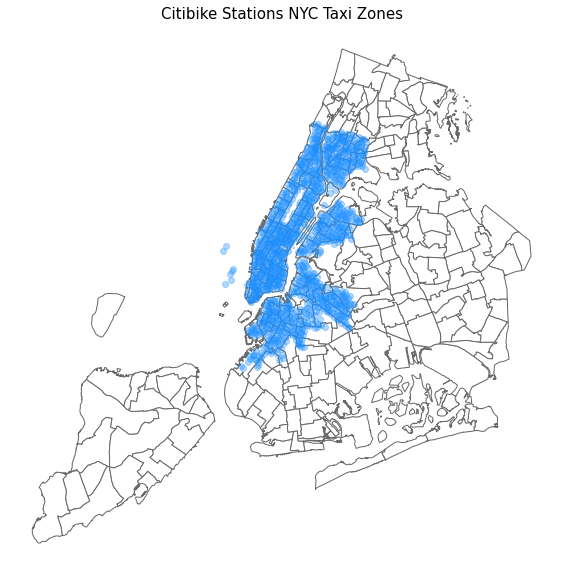

In [17]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
taxi.plot(ax=ax, color='white', edgecolor='dimgray')
citi_gdf.plot(ax=ax, color='dodgerblue', alpha=0.35)
ax.set_title('Citibike Stations NYC Taxi Zones', fontsize=15)
ax.axis('off');

## Merging Data

There are two ways we can merge data in GeoPandas:
1. Attribute join
2. Spatial join

### Attribute join
This is when you merge two datasets based on a common column. Similar to how you would merge two regular `pandas DataFrame`s. 

**IMPORTANT**

When merging a `GeoDataFrame` and a `DataFrame`, it is important that the **left** `DataFrame` is the one with the geospatial data. Otherwise, the `GeoDataFrame` will turn into a regular `DataFrame` and lose all the features and functions of a `GeoDataFrame`.

**Data**
- World Population Data (World Bank): http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv
- Countries shapefile: https://www.naturalearthdata.com/downloads/10m-cultural-vectors/10m-admin-0-countries/

*Note: The countries shapefile is also available within geopandas through `gpd.datasets.get_path('naturalearth_lowres')` but this data seems to be outdated as it only has 177 rows.*

In [18]:
# Read in the shapefile from the download
world = gpd.read_file('./ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp')
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,5,2,Indonesia,IDN,0,2,Sovereign country,Indonesia,IDN,...,인도네시아,Indonesië,Indonezja,Indonésia,Индонезия,Indonesien,Endonezya,Indonesia,印度尼西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 country,5,3,Malaysia,MYS,0,2,Sovereign country,Malaysia,MYS,...,말레이시아,Maleisië,Malezja,Malásia,Малайзия,Malaysia,Malezya,Malaysia,马来西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Admin-0 country,6,2,Chile,CHL,0,2,Sovereign country,Chile,CHL,...,칠레,Chili,Chile,Chile,Чили,Chile,Şili,Chile,智利,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,Bolivia,BOL,...,볼리비아,Bolivia,Boliwia,Bolívia,Боливия,Bolivia,Bolivya,Bolivia,玻利維亞,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,Peru,PER,...,페루,Peru,Peru,Peru,Перу,Peru,Peru,Peru,秘鲁,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [19]:
population = pd.read_csv('./API_SP.POP.TOTL_DS2_en_csv_v2_2252106/API_SP.POP.TOTL_DS2_en_csv_v2_2252106.csv',
                         skiprows=3)
population.dropna(axis=1, how='all', inplace=True)
print(len(population))
population.head(3)

264


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,...,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,...,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0


In [20]:
country_shapes = world[['ADMIN', 'ADM0_A3', 'geometry']]
type(country_shapes)

geopandas.geodataframe.GeoDataFrame

In [21]:
# Merge the two dataframes
# Here I used LEFT JOIN first to be able to get all the country shapes
country_pop = country_shapes.merge(population, left_on='ADM0_A3', right_on='Country Code', how='left')
country_pop.head()

,ADMIN,ADM0_A3,geometry,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Indonesia,IDN,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",Indonesia,IDN,"Population, total",SP.POP.TOTL,87751068.0,90098394.0,92518377.0,...,241834215.0,245116206.0,248452413.0,251806402.0,255129004.0,258383256.0,261554226.0,264645886.0,267663435.0,270625568.0
1,Malaysia,MYS,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...",Malaysia,MYS,"Population, total",SP.POP.TOTL,8156347.0,8417824.0,8692342.0,...,28208035.0,28650955.0,29068159.0,29468872.0,29866559.0,30270962.0,30684804.0,31105028.0,31528585.0,31949777.0
2,Chile,CHL,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...",Chile,CHL,"Population, total",SP.POP.TOTL,8132990.0,8303811.0,8476897.0,...,17062536.0,17233576.0,17400347.0,17571507.0,17758959.0,17969353.0,18209068.0,18470439.0,18729160.0,18952038.0
3,Bolivia,BOL,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...",Bolivia,BOL,"Population, total",SP.POP.TOTL,3656955.0,3728964.0,3802990.0,...,10048590.0,10212954.0,10377676.0,10542376.0,10706517.0,10869730.0,11031813.0,11192854.0,11353142.0,11513100.0
4,Peru,PER,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...",Peru,PER,"Population, total",SP.POP.TOTL,10155015.0,10446620.0,10749466.0,...,29027674.0,29264318.0,29506788.0,29773987.0,30090359.0,30470734.0,30926032.0,31444297.0,31989256.0,32510453.0


In [22]:
# However, looking at the tail of the dataset, we can see that there are certain areas that have no population data
country_pop.tail()

,ADMIN,ADM0_A3,geometry,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
250,Macao S.A.R,MAC,"MULTIPOLYGON (((113.55860 22.16303, 113.56943 ...","Macao SAR, China",MAC,"Population, total",SP.POP.TOTL,167791.0,170462.0,176183.0,...,538219.0,550832.0,564039.0,577372.0,590208.0,602085.0,612836.0,622585.0,631636.0,640445.0
251,Ashmore and Cartier Islands,ATC,"POLYGON ((123.59702 -12.42832, 123.59775 -12.4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252,Bajo Nuevo Bank (Petrel Is.),BJN,"POLYGON ((-79.98929 15.79495, -79.98782 15.796...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
253,Serranilla Bank,SER,"POLYGON ((-78.63707 15.86209, -78.64041 15.864...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,Scarborough Reef,SCR,"POLYGON ((117.75389 15.15437, 117.75569 15.151...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(-197.99999999999991, 198.0, -62.8961344667999, 90.61173089680007)

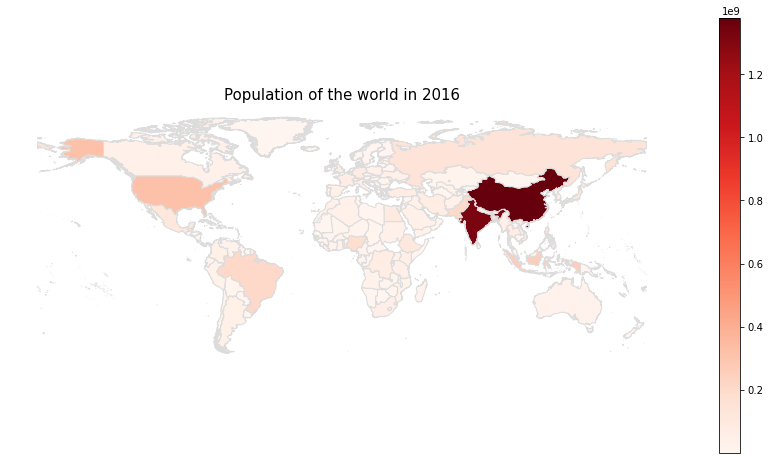

In [23]:
ax = country_pop.plot(figsize=(15,8), column='2016', cmap=plt.cm.Reds, legend=True, edgecolor='gainsboro')
ax.set_title('Population of the world in 2016', fontsize=15);
ax.axis(False)

In [24]:
# Let's drop the rows with NaN's so we can actually see the population distribution arcoss the world
country_pop.dropna(axis=0, how='any', inplace=True)
country_pop.shape

(209, 67)

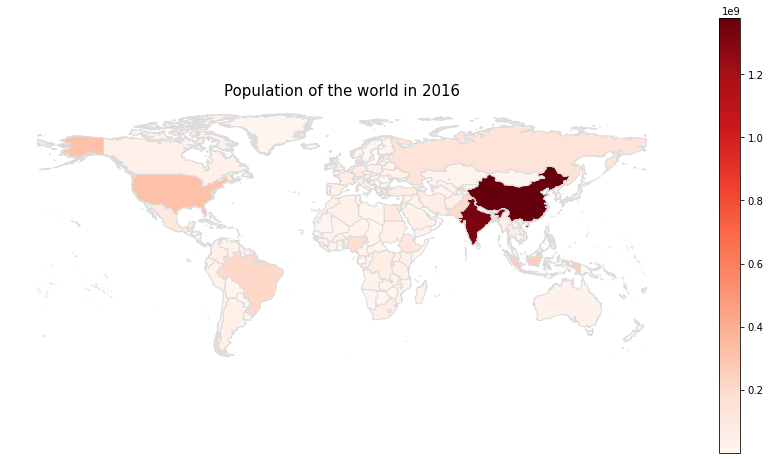

In [25]:
ax = country_pop.plot(figsize=(15,8), column='2016', cmap=plt.cm.Reds, legend=True, edgecolor='gainsboro')
ax.set_title('Population of the world in 2016', fontsize=15)
ax.axis('off');

### Spatial Join
Spatial join is already built into `geopandas` through the function `gpd.sjoin()`. The spatial operation is passed through the parameter `op` and the join can also be specified like a merge in `pandas` through the parameter `how`.

The main thing to remember when doing a spatial join is the **order** of the `GeoDataFrame` parameters you pass matters. When you do an `sjoin`, only the geometry of the left `GeoDataFrame` is left in the merged data. So make sure you carefully consider what data you want left behind and it also depends on what question you are trying to answer.

In [26]:
gpd.sjoin?

#### Data Cleaning through Spatial Join
Another useful purpose of a spatial join is to clean out erroneous data or exclude data from the study area. From our previous example of the Citibike stations and NYC taxi zones, we can now remove the erroneous data from the NYC study area.

In [27]:
# This spatial join will return the points within a polygon
# The basic question answered here is "in which taxi zone is the station located?"
stations_within = gpd.sjoin(citi_gdf, taxi, op='within')
stations_within.head()

,end station longitude,end station latitude,geometry,index_right,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough
0,-73.990050,40.772370,POINT (987005.878 220672.357),142,143,0.05418,0.000151,Lincoln Square West,143,Manhattan
60,-73.989187,40.775160,POINT (987244.799 221688.704),142,143,0.05418,0.000151,Lincoln Square West,143,Manhattan
103,-73.982886,40.777480,POINT (988989.819 222534.574),142,143,0.05418,0.000151,Lincoln Square West,143,Manhattan
658,-73.984706,40.774667,POINT (988486.007 221509.481),142,143,0.05418,0.000151,Lincoln Square West,143,Manhattan
773,-73.990460,40.771497,POINT (986892.258 220354.176),142,143,0.05418,0.000151,Lincoln Square West,143,Manhattan


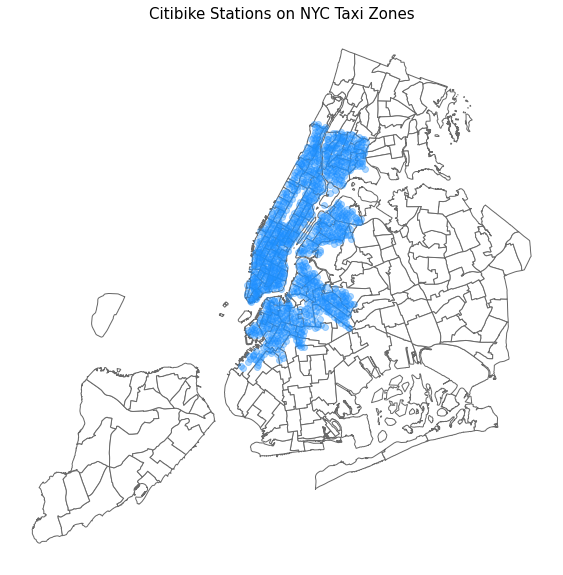

In [28]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
taxi.plot(ax=ax, color='white', edgecolor='dimgray')
stations_within.plot(ax=ax, color='dodgerblue', alpha=0.35)
ax.set_title('Citibike Stations on NYC Taxi Zones', fontsize=15)
ax.axis('off');

In [29]:
# This spatial will return the polygons that contain points
# The basic question answered here is "which taxi zones have citibike stations?"
zones_with_stations = gpd.sjoin(taxi, citi_gdf, op='contains')
zones_with_stations.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,index_right,end station longitude,end station latitude
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",33,-73.977932,40.720828
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",929,-73.980858,40.720874
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",2,-73.976687,40.722281
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",414,-73.979955,40.722992
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",170,-73.975767,40.723870


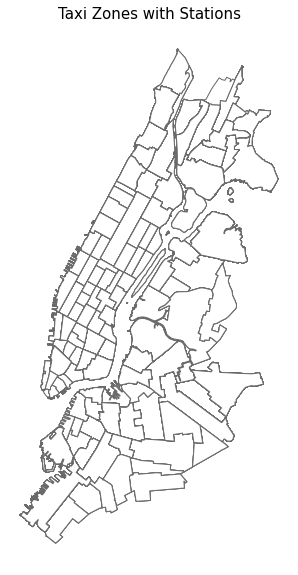

In [30]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
zones_with_stations.plot(ax=ax, color='white', edgecolor='dimgray')
ax.set_title('Taxi Zones with Stations', fontsize=15)
ax.axis('off');

In [31]:
print(healthsites.crs)
print(ph.crs)

epsg:4326
epsg:4326


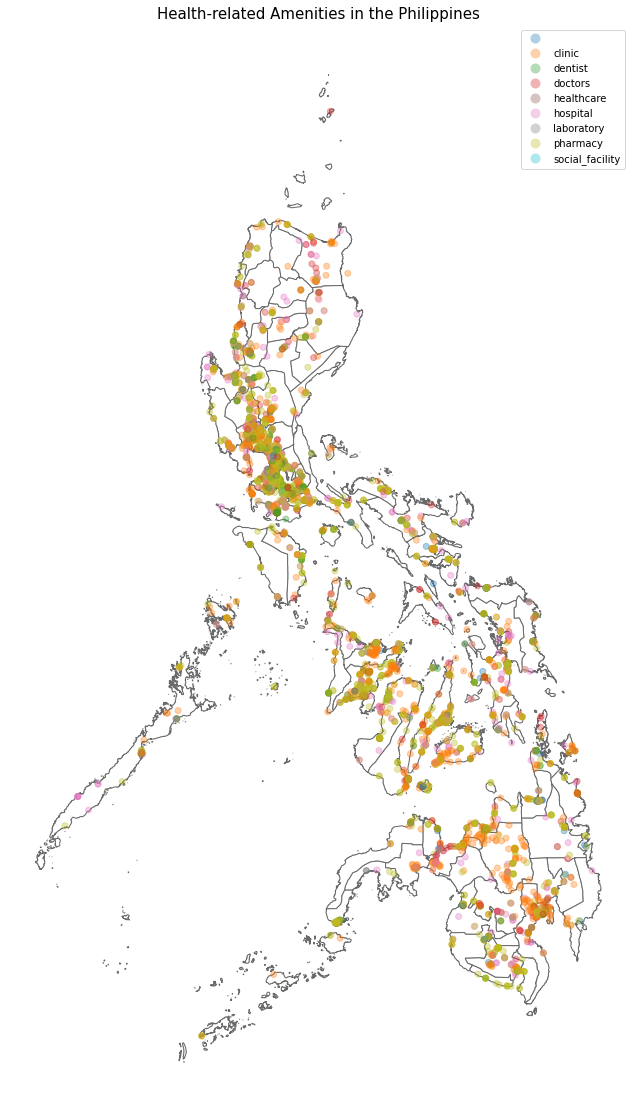

In [32]:
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)
ph.plot(ax=ax, color='white', edgecolor='dimgray')
healthsites.plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Health-related Amenities in the Philippines', fontsize=15)
ax.axis('off');

In [33]:
healthsites.describe(include=np.object)

<ipython-input-33-6f105f861a18>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  healthsites.describe(include=np.object)


,osm_type,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,insurance,staff_doctors,contact_number,...,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag
count,10405,10405,10405,10405,10405,10405,10405,10405,10405,10405,...,10405,10365,10405,10405,10405,10405,10405,10405,1,1
unique,2,1,9,98,1668,873,5,2,2,332,...,2,1667,4,7,2,26,53,16,1,1
top,node,,pharmacy,,,,,,,,...,,GOwin,,,,,,,0,"drugs, prescription, medical supplies, first-aid"
freq,7481,10405,4078,10043,7014,9311,9868,10404,10404,10069,...,10404,1904,10327,10399,10404,9647,6405,9330,1,1


In [34]:
healthsites.isna().sum()

osm_id                     0
osm_type                   0
completeness               0
is_in_health_zone          0
amenity                    0
speciality                 0
addr_street                0
operator                   0
water_source               0
changeset_id              40
insurance                  0
staff_doctors              0
contact_number             0
uuid                       0
electricity                0
opening_hours              0
operational_status         0
source                     0
is_in_health_area          0
health_amenity_type        0
changeset_version         40
emergency                  0
changeset_timestamp       40
addr_housenumber           0
addr_postcode              0
addr_city                  0
name                       0
staff_nurses               0
changeset_user            40
wheelchair                 0
beds                       0
url                        0
dispensing                 0
healthcare                 0
operator_type 

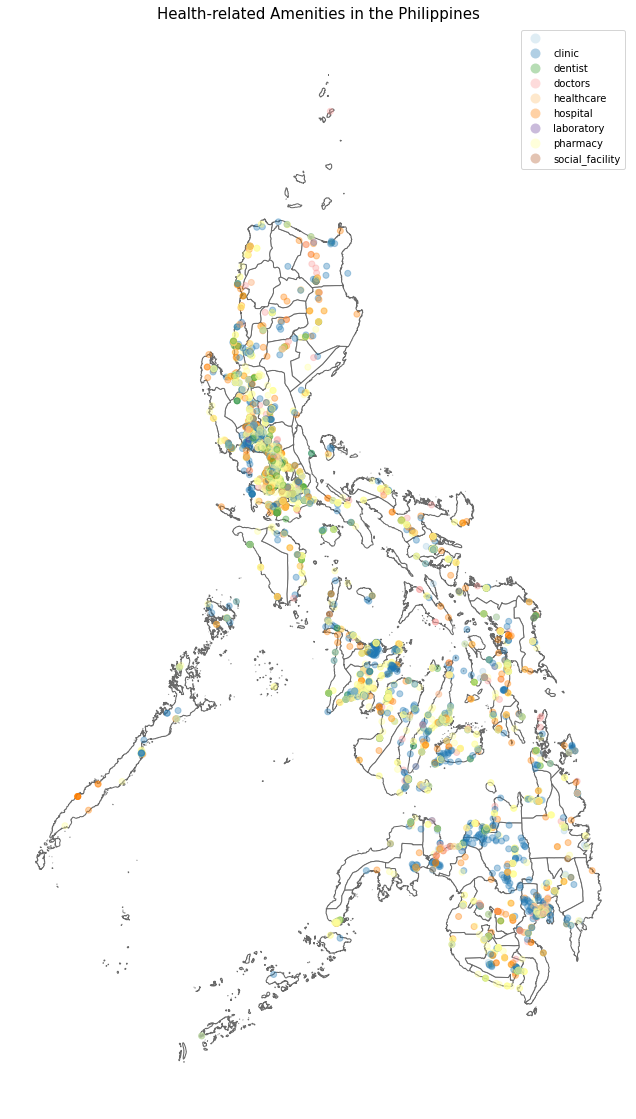

In [35]:
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)

ph.plot(ax=ax, color='white', edgecolor='dimgray')
healthsites.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Health-related Amenities in the Philippines', fontsize=15)
ax.axis('off');

<AxesSubplot:>

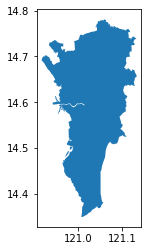

In [36]:
mm = ph[ph.NAME_1=="Metropolitan Manila"]
mm.plot()

<AxesSubplot:>

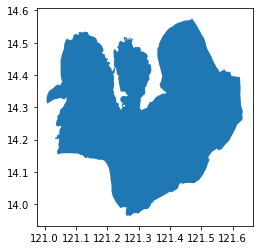

In [37]:
lag = ph[ph.NAME_1=="Laguna"]
lag.plot()

# Exercise

#### Name: Angeline Maris M. Gubat
#### Section: S12

For this individual exercise, your task is to use the PH Administrative Areas and Health Sites datasets, and produce an effective visualization for the following question:

### How many health-related amenities are there in provinces where you, your family, and your relatives are currently residing in?

In your plot, there should be a minimum of 2 provinces and a maximum of 5 provinces. There should be separate plots for each type of amenity available.

### Identify the Values

We check for each unique amenity in the healthsites dataframe and separate them

In [38]:
healthsites['amenity'].unique()

array(['pharmacy', 'doctors', 'hospital', 'clinic', 'dentist', '',
       'laboratory', 'social_facility', 'healthcare'], dtype=object)

In [39]:
pharmacies = healthsites.loc[healthsites['amenity']=="pharmacy"]
doctors = healthsites.loc[healthsites['amenity']=="doctors"]
dentists = healthsites.loc[healthsites['amenity']=="dentist"]
clinics = healthsites.loc[healthsites['amenity']=="clinic"]
healthcares = healthsites.loc[healthsites['amenity']=="healthcare"]
hospitals = healthsites.loc[healthsites['amenity']=="hospital"]
loboratories = healthsites.loc[healthsites['amenity']=="laboratory"]
social_facilities = healthsites.loc[healthsites['amenity']=="social_facility"]



We create the locations we wish to use. My family and relatives live in Metro Manila. I added Laguna as my second location as it is the province where I study and most of my friends live in.

In [40]:
phMM = ph.loc[ph['NAME_1']=="Metropolitan Manila"]
phLag = ph.loc[ph['NAME_1']=="Laguna"]

### Metro Manila

As all sets are GeoDataframes, we can use Spatial Join to create our visualizations. 

In [41]:
mm_phar = gpd.sjoin(pharmacies, phMM, op ='within')
mm_doc = gpd.sjoin(doctors, phMM, op ='within')
mm_den = gpd.sjoin(dentists, phMM, op ='within')
mm_cli = gpd.sjoin(clinics, phMM, op ='within')
mm_hc = gpd.sjoin(healthcares, phMM, op ='within')
mm_hos = gpd.sjoin(hospitals, phMM, op ='within')
mm_lab = gpd.sjoin(loboratories, phMM, op ='within')
mm_sf = gpd.sjoin(social_facilities, phMM, op ='within')

We ignore laboratories and social facilities as they are empty (shown in the next cell)

In [42]:
print(mm_lab['osm_id'].count())
print(mm_sf['osm_id'].count())

0
0


We use a 2 x 3 plot to show each amenity and display the plots:

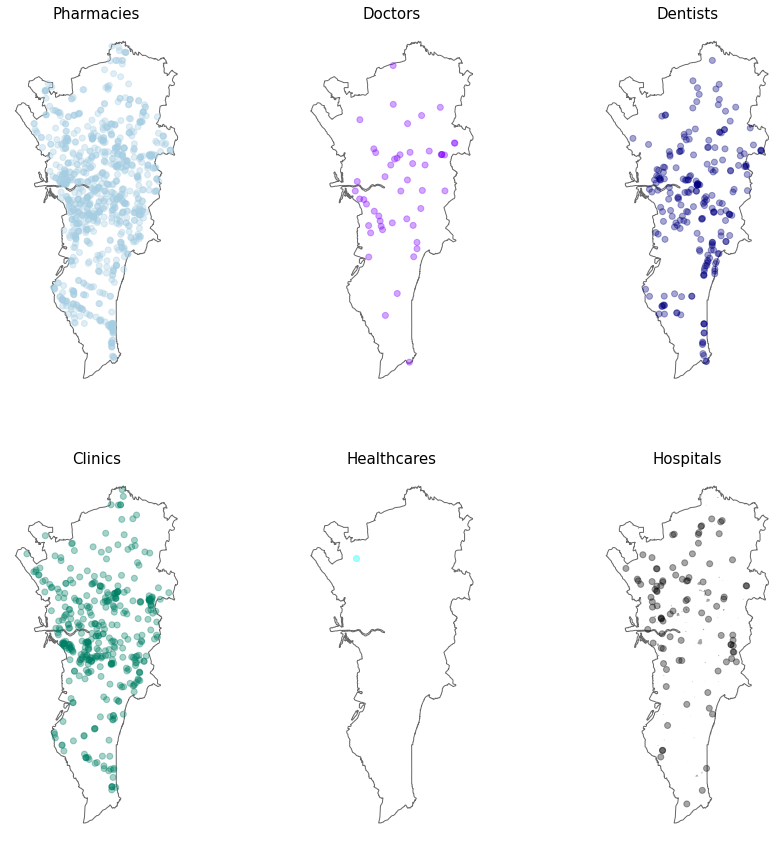

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

In [43]:
fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(231)
phMM.plot(ax=ax, color='white', edgecolor='dimgray')
mm_phar.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=False)
ax.set_title('Pharmacies', fontsize=15)
ax.axis('off');

fig2 = plt.figure(figsize = (15, 15))
ax2 = fig.add_subplot(232)
phMM.plot(ax=ax2, color='white', edgecolor='dimgray')
mm_doc.plot(ax=ax2, column="amenity", cmap="rainbow", alpha=0.35, legend=False)
ax2.set_title('Doctors', fontsize=15)
ax2.axis('off');

fig3 = plt.figure(figsize = (15, 15))
ax3 = fig.add_subplot(233)
phMM.plot(ax=ax3, color='white', edgecolor='dimgray')
mm_den.plot(ax=ax3, column="amenity", cmap="jet", alpha=0.35, legend=False)
ax3.set_title('Dentists', fontsize=15)
ax3.axis('off');

fig4 = plt.figure(figsize = (15, 15))
ax4 = fig.add_subplot(234)
phMM.plot(ax=ax4, color='white', edgecolor='dimgray')
mm_cli.plot(ax=ax4, column="amenity", cmap="summer", alpha=0.35, legend=False)
ax4.set_title('Clinics', fontsize=15)
ax4.axis('off');

fig5 = plt.figure(figsize = (15, 15))
ax5 = fig.add_subplot(235)
phMM.plot(ax=ax5, color='white', edgecolor='dimgray')
mm_hc.plot(ax=ax5, column="amenity", cmap="cool", alpha=0.35, legend=False)
ax5.set_title('Healthcares', fontsize=15)
ax5.axis('off');

fig6 = plt.figure(figsize = (15, 15))
ax6 = fig.add_subplot(236)
phMM.plot(ax=ax6, color='white', edgecolor='dimgray')
mm_hos.plot(ax=ax6, column="amenity", cmap="gist_earth", alpha=0.35, legend=False)
ax6.set_title('Hospitals', fontsize=15)
ax6.axis('off');

### Laguna

We perform the same steps but changing the compared map to the Laguna map

In [44]:
lag_phar = gpd.sjoin(pharmacies, phLag, op ='within')
lag_doc = gpd.sjoin(doctors, phLag, op ='within')
lag_den = gpd.sjoin(dentists, phLag, op ='within')
lag_cli = gpd.sjoin(clinics, phLag, op ='within')
lag_hc = gpd.sjoin(healthcares, phLag, op ='within')
lag_hos = gpd.sjoin(hospitals, phLag, op ='within')
lag_lab = gpd.sjoin(loboratories, phLag, op ='within')
lag_sf = gpd.sjoin(social_facilities, phLag, op ='within')

Healthcare, laboratories, and social facilities are empty. They will be skipped when displying the final plot.

In [45]:
print(lag_hc['osm_id'].count())
print(lag_lab['osm_id'].count())
print(lag_sf['osm_id'].count())

0
0
0


The non-empty amenities are shown through the code below:

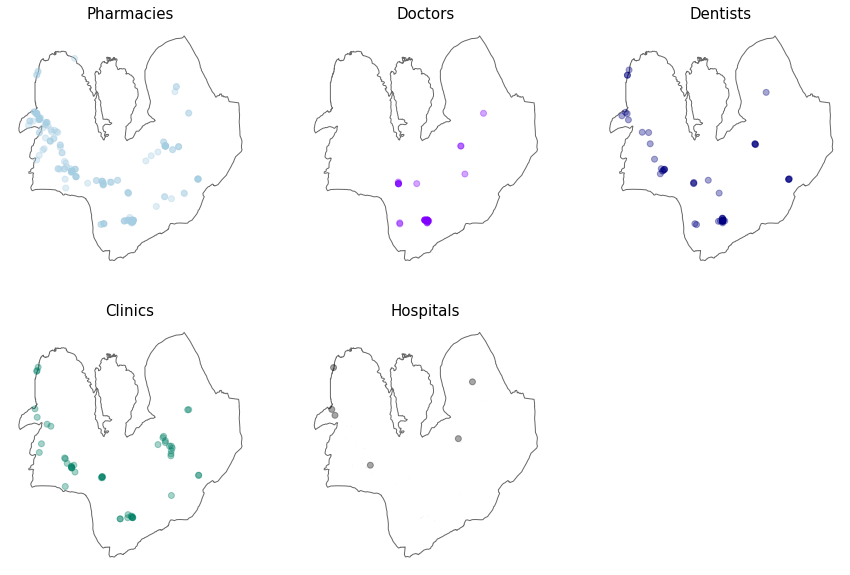

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

In [46]:
fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(231)
phLag.plot(ax=ax, color='white', edgecolor='dimgray')
lag_phar.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=False)
ax.set_title('Pharmacies', fontsize=15)
ax.axis('off');

fig2 = plt.figure(figsize = (15, 10))
ax2 = fig.add_subplot(232)
phLag.plot(ax=ax2, color='white', edgecolor='dimgray')
lag_doc.plot(ax=ax2, column="amenity", cmap="rainbow", alpha=0.35, legend=False)
ax2.set_title('Doctors', fontsize=15)
ax2.axis('off');

fig3 = plt.figure(figsize = (15, 10))
ax3 = fig.add_subplot(233)
phLag.plot(ax=ax3, color='white', edgecolor='dimgray')
lag_den.plot(ax=ax3, column="amenity", cmap="jet", alpha=0.35, legend=False)
ax3.set_title('Dentists', fontsize=15)
ax3.axis('off');

fig4 = plt.figure(figsize = (15, 10))
ax4 = fig.add_subplot(234)
phLag.plot(ax=ax4, color='white', edgecolor='dimgray')
lag_cli.plot(ax=ax4, column="amenity", cmap="summer", alpha=0.35, legend=False)
ax4.set_title('Clinics', fontsize=15)
ax4.axis('off');

fig5 = plt.figure(figsize = (15, 10))
ax5 = fig.add_subplot(235)
phLag.plot(ax=ax5, color='white', edgecolor='dimgray')
lag_hos.plot(ax=ax5, column="amenity", cmap="gist_earth", alpha=0.35, legend=False)
ax5.set_title('Hospitals', fontsize=15)
ax5.axis('off');